# 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
LEtrain = pd.read_csv('train.csv')
LEtest = pd.read_csv('test.csv')

LE_Xtrain = LEtrain.drop(['TARGET_LifeExpectancy', 'ID'], axis=1)
LE_ytrain = LEtrain['TARGET_LifeExpectancy']

def remove_outliers(df):
    Q1 = df.quantile(0.15)
    Q3 = df.quantile(0.85)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.7 * IQR
    upper_bound = Q3 + 1.7 * IQR
    df_out = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    return df_out

LE_Xtrain_no_outliers = remove_outliers(LE_Xtrain)
LEtest_no_outliers = remove_outliers(LEtest.drop(['ID'], axis=1))

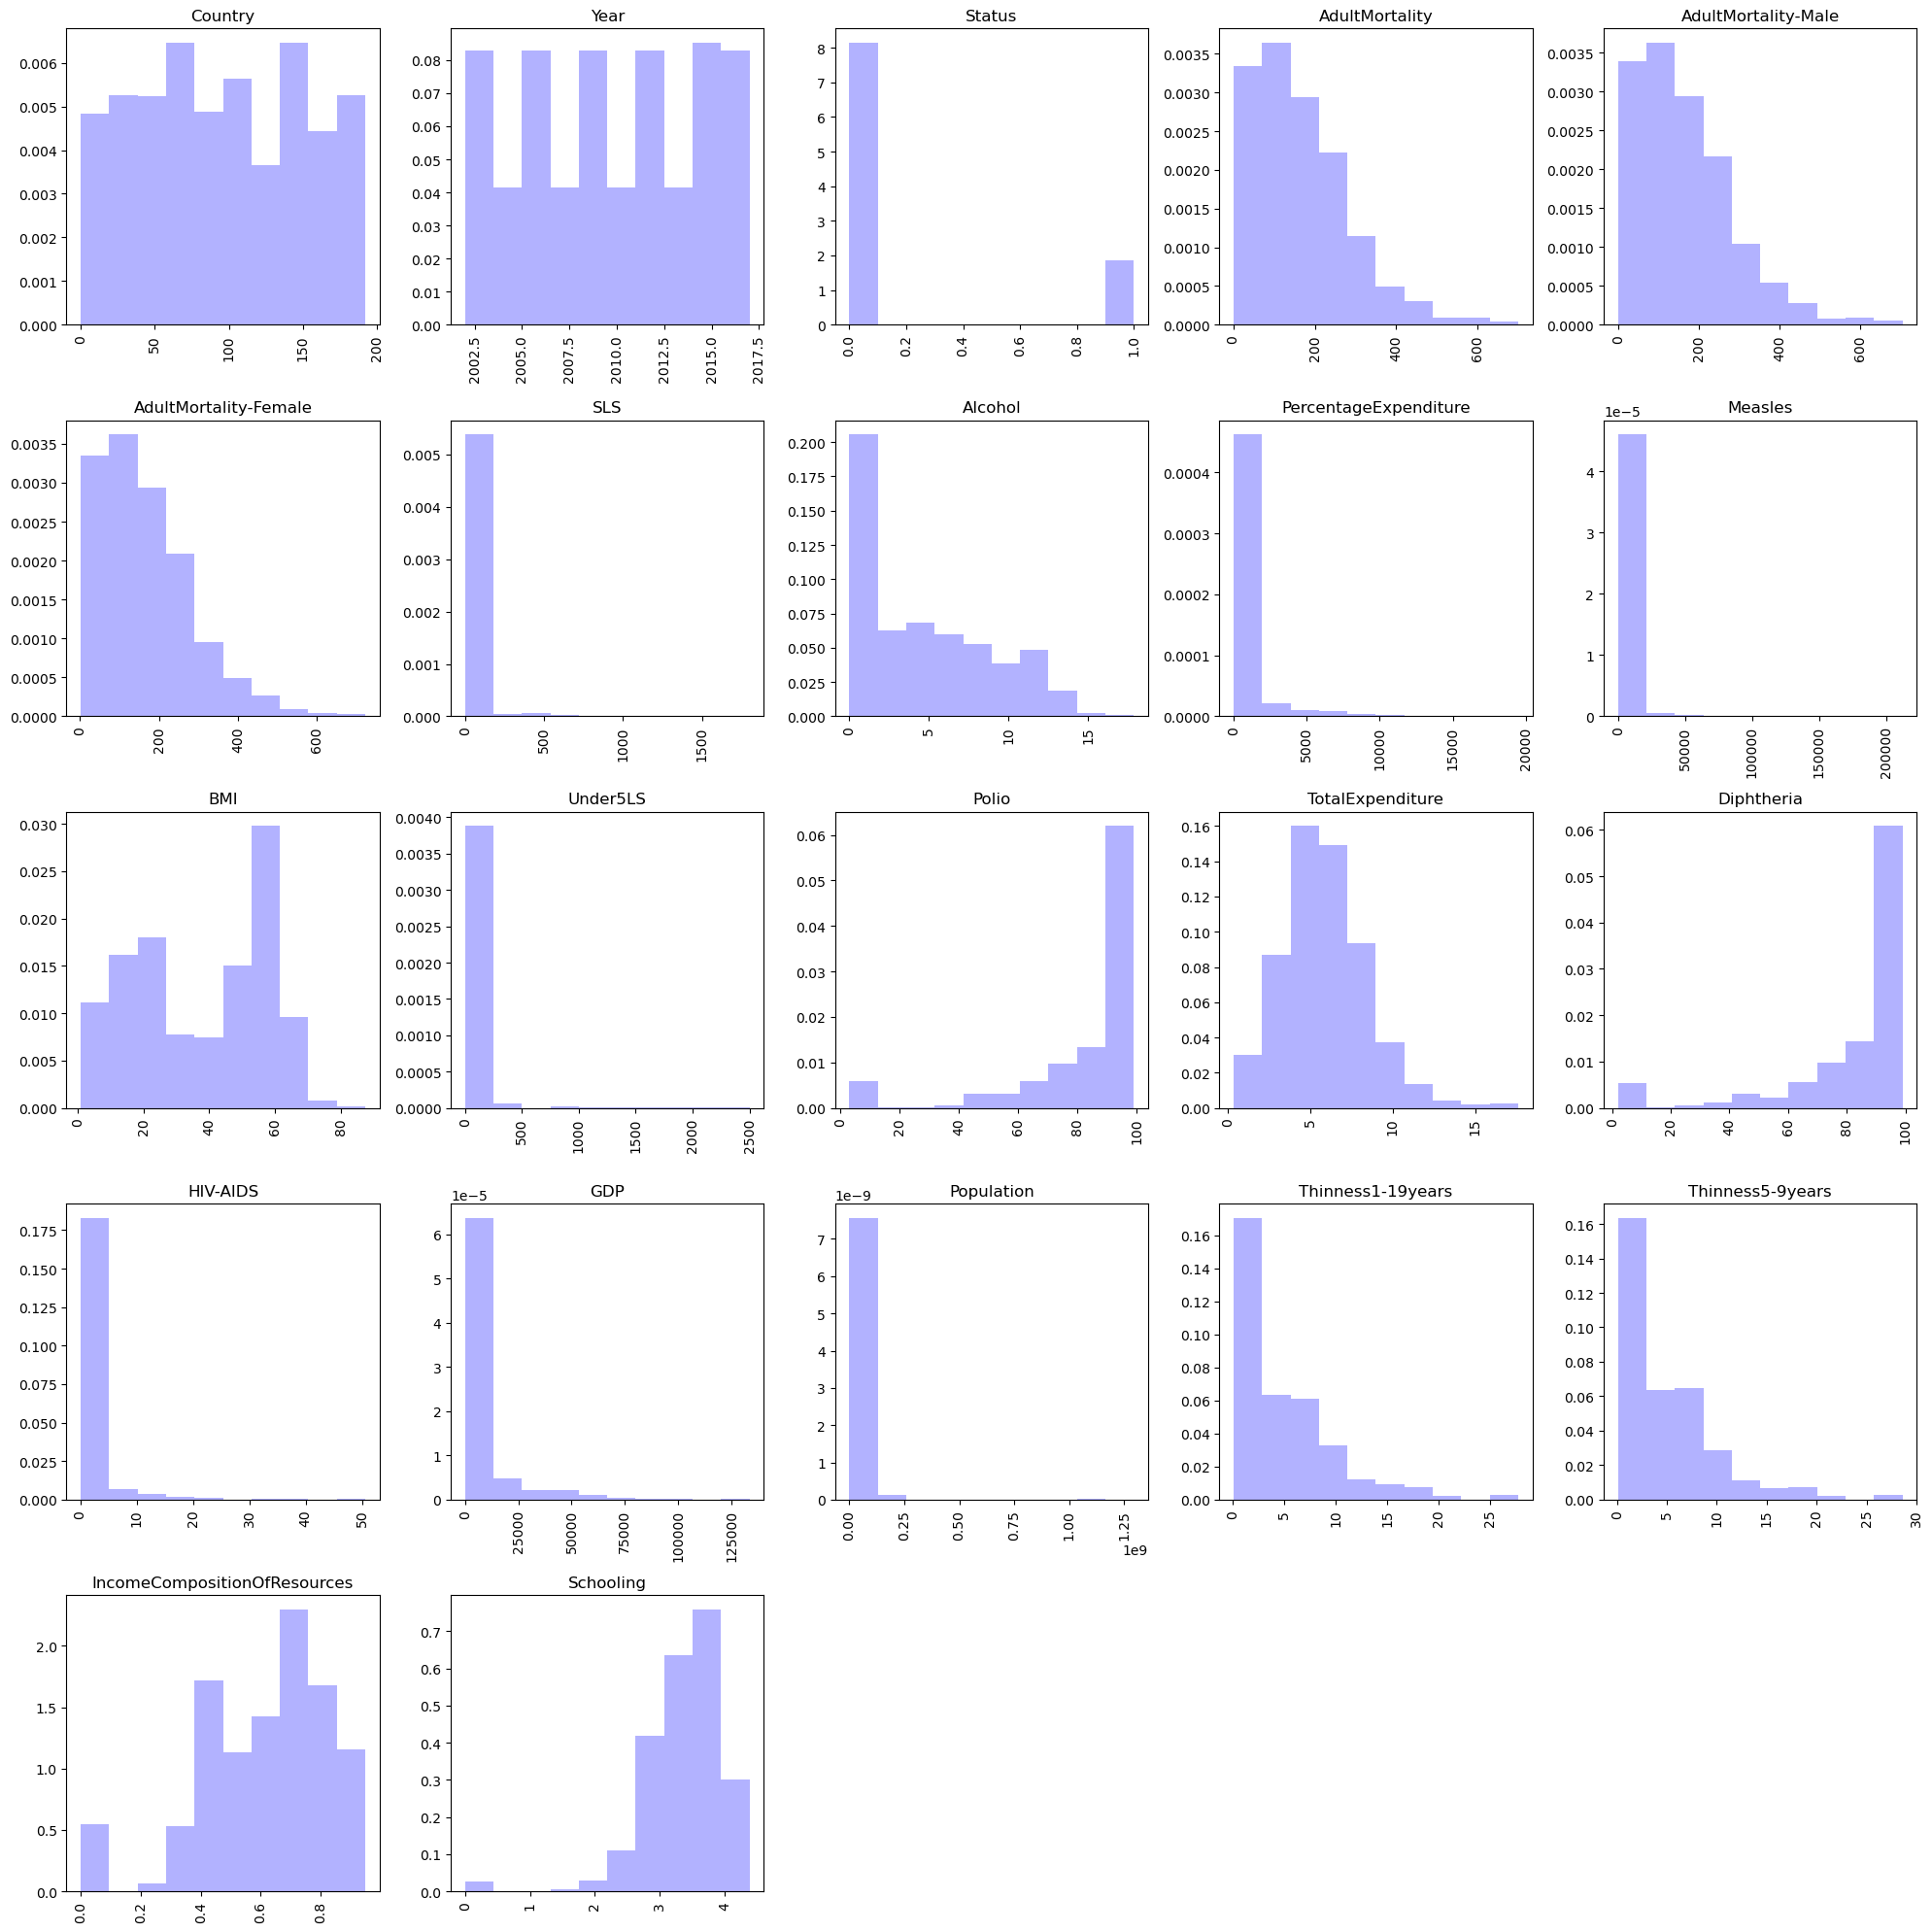

In [3]:
num_columns = len(LE_Xtrain.columns)
num_rows = np.ceil(num_columns / 5).astype(int)

plt.figure(figsize=(20, 4 * num_rows))
for i, col in enumerate(LE_Xtrain.columns):
    plt.subplot(num_rows, 5, i+1)
    if np.issubdtype(LE_Xtrain[col].dtype, np.number):
        plt.hist(LE_Xtrain[col], alpha=0.3, color='b', density=True)
    else:
        LE_Xtrain[col].value_counts().plot(kind='bar', alpha=0.3, color='b')
    plt.title(col)
    plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

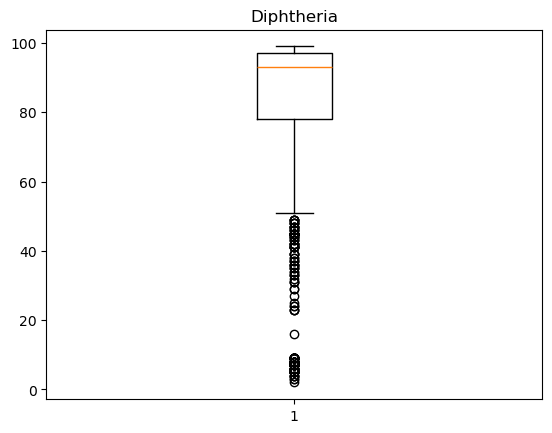

In [4]:
plt.boxplot(LEtrain['Diphtheria'])
plt.title('Diphtheria')
plt.show()

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

minmax_attributes = [
    'Alcohol', 'PercentageExpenditure', 'BMI', 'Polio', 'TotalExpenditure',
    'Diphtheria', 'IncomeCompositionOfResources', 'Schooling'
]
power_transform_attributes = [
    'AdultMortality', 'AdultMortality-Female', 'AdultMortality-Male', 'SLS',
    'Measles', 'Under5LS', 'HIV-AIDS', 'GDP', 'Population', 'Thinness1-19years',
    'Thinness5-9years'
]

LE_Xtrain_scaled = LE_Xtrain.copy()
LEtest_scaled = LEtest.copy()

minmax_scaler = MinMaxScaler().fit(LE_Xtrain_scaled[minmax_attributes])
LE_Xtrain_scaled[minmax_attributes] = minmax_scaler.transform(LE_Xtrain_scaled[minmax_attributes])
LEtest_scaled[minmax_attributes] = minmax_scaler.transform(LEtest_scaled[minmax_attributes])

power_transformer = PowerTransformer(method='yeo-johnson', standardize=False).fit(LE_Xtrain_scaled[power_transform_attributes])
LE_Xtrain_scaled[power_transform_attributes] = power_transformer.transform(LE_Xtrain_scaled[power_transform_attributes])
LEtest_scaled[power_transform_attributes] = power_transformer.transform(LEtest_scaled[power_transform_attributes])

minmax_scaler_pt = MinMaxScaler().fit(LE_Xtrain_scaled[power_transform_attributes])
LE_Xtrain_scaled[power_transform_attributes] = minmax_scaler_pt.transform(LE_Xtrain_scaled[power_transform_attributes])
LEtest_scaled[power_transform_attributes] = minmax_scaler_pt.transform(LEtest_scaled[power_transform_attributes])

LEtest_scaled = LEtest_scaled.drop('ID', axis=1)

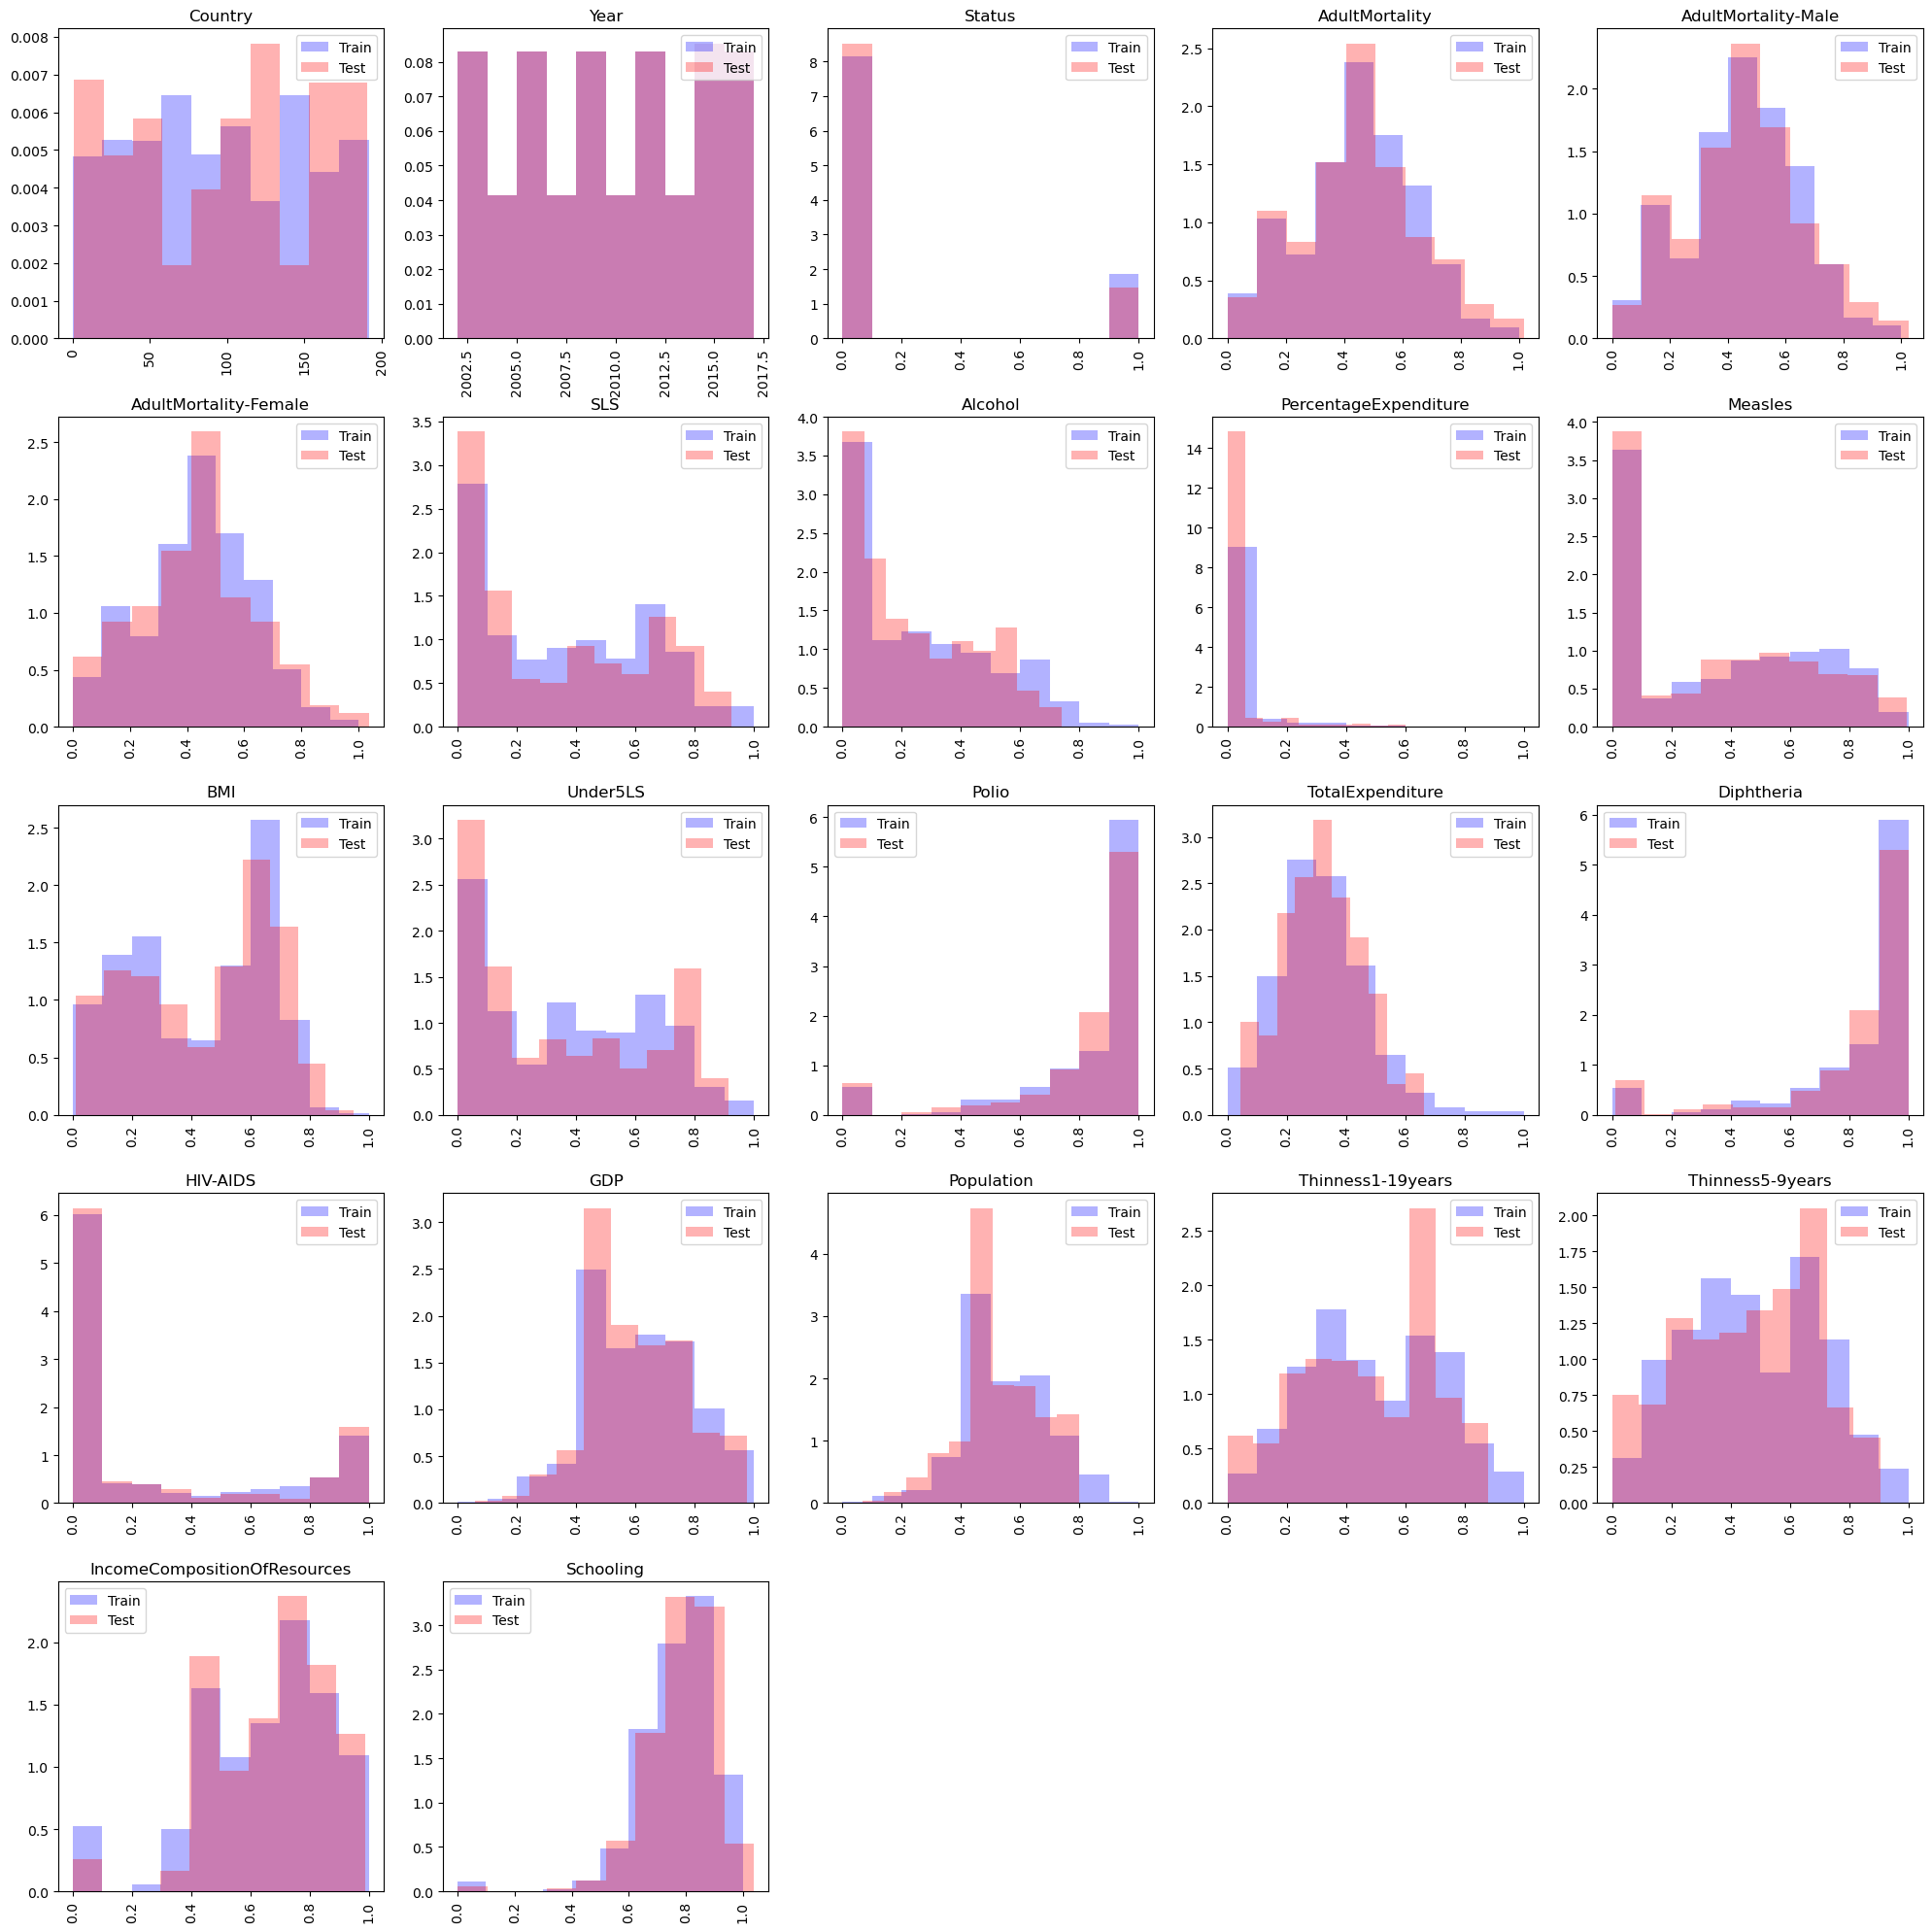

In [6]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(LE_Xtrain_scaled.columns):
    plt.subplot(5, 5, i+1)
    plt.hist(LE_Xtrain_scaled[col], alpha=0.3, color='b', density=True, label='Train')
    plt.hist(LEtest_scaled[col], alpha=0.3, color='r', density=True, label='Test')
    plt.title(col)
    plt.xticks(rotation='vertical')
    plt.legend()

plt.tight_layout()
plt.show()

In [7]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression().fit(LE_Xtrain_scaled, LE_ytrain)

In [8]:
print("Parameter of the Linear model: ", model_lr.coef_)
print("Intercept of the Linear model: ", model_lr.intercept_)

Parameter of the Linear model:  [-2.51681199e-03  1.33326568e-01  1.79073404e+00 -2.18048322e+03
  1.09788143e+03  1.10026720e+03  9.67087471e+00  1.81162424e+00
  2.88593678e+00 -9.32044759e-01 -5.32614567e-01 -1.29192266e+01
  1.02072797e+00 -1.42467962e+00  2.30074504e+00 -9.66263964e+00
  2.09746624e+00  8.34185824e-01  1.84231166e+00 -5.44946455e+00
  6.32799274e+00  4.38043100e+00]
Intercept of the Linear model:  -206.89579852704787


In [9]:
LE_y_test_pred = model_lr.predict(LE_Xtrain_scaled)

C:\Users\nibba\AppData\Local\Temp\ipykernel_27636\3098769570.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(LE_ytrain, LE_y_test_pred, s=25, cmap=plt.cm.coolwarm, zorder=10)


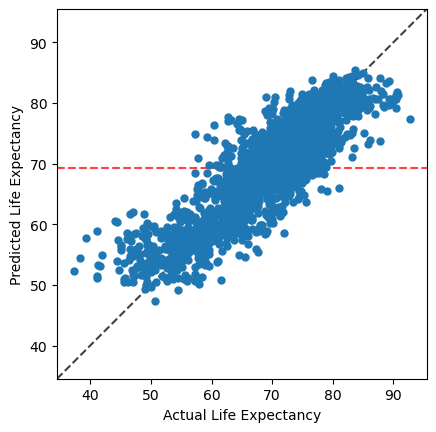

In [10]:
fig, ax = plt.subplots()
ax.scatter(LE_ytrain, LE_y_test_pred, s=25, cmap=plt.cm.coolwarm, zorder=10)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
ax.plot(lims, [np.mean(LE_ytrain),]*2, 'r--', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')

plt.show()

In [11]:
from sklearn.metrics import r2_score

r2_lr = r2_score(LE_ytrain, LE_y_test_pred)
print('The R^2 score for the linier regression model is: {:.3f}'.format(r2_lr))

The R^2 score for the linier regression model is: 0.775


In [12]:
model_us_lr = LinearRegression()
model_us_lr.fit(LE_Xtrain, LE_ytrain)

LE_y_train_us_pred = model_us_lr.predict(LE_Xtrain)
r2_us_lr = r2_score(LE_ytrain, LE_y_train_us_pred)
print('The R^2 score for the linear regression model (without feature scaling) is: {:.3f}'.format(r2_us_lr))

The R^2 score for the linear regression model (without feature scaling) is: 0.758


In [13]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1)

ridge_model.fit(LE_Xtrain_scaled, LE_ytrain)
LE_ytrain_pred_ridge = ridge_model.predict(LE_Xtrain_scaled)
r2_score_ridge = r2_score(LE_ytrain, LE_ytrain_pred_ridge)

print(f'R^2 score for the regularised Regression model: {r2_score_ridge:.3f}')

R^2 score for the regularised Regression model: 0.769


In [14]:
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-6, 6, 13)

ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(LE_Xtrain_scaled, LE_ytrain)

optimal_alpha = ridge_cv.alpha_

print(f"Optimal alpha: {optimal_alpha}")

Optimal alpha: 1e-05


In [15]:
from sklearn.model_selection import cross_val_score

model = Ridge(alpha=optimal_alpha)
scores = cross_val_score(model, LE_Xtrain_scaled, LE_ytrain, cv=5, scoring='r2')

print("R2 scores for each fold:", scores)
print("Average R2 score:", np.mean(scores))

R2 scores for each fold: [0.76048123 0.73657817 0.72275893 0.72255436 0.75909203]
Average R2 score: 0.7402929438645538


In [16]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge_reg = Ridge(alpha=optimal_alpha)

ridge_reg.fit(LE_Xtrain_scaled, LE_ytrain)
LE_y_train_pred_ridge = ridge_reg.predict(LE_Xtrain_scaled)

mse_ridge = mean_squared_error(LE_ytrain, LE_y_train_pred_ridge)
rmse_ridge = mse_ridge ** 0.5

print(f'RMSE for the Ridge Regression model: {rmse_ridge:.3f}')

RMSE for the Ridge Regression model: 4.495


In [17]:
LE_test_pred = ridge_reg.predict(LEtest_scaled)
sample_solution = pd.read_csv('sample_solution.csv')

submission = pd.DataFrame({
    'ID': sample_solution['ID'],
    'TARGET_LifeExpectancy': LE_test_pred
})

assert all(submission['ID'] == LEtest['ID'])
submission.to_csv('my_predictions.csv', index=False)

print("Prediction file saved as 'my_predictions.csv'.")

Prediction file saved as 'my_predictions.csv'.


In [18]:
myPrediction = pd.read_csv('my_predictions.csv')
print(myPrediction)

      ID  TARGET_LifeExpectancy
0      1              58.557016
1      2              58.746701
2      3              58.243419
3      4              58.336593
4      5              57.891180
..   ...                    ...
862  863              50.100452
863  864              49.914398
864  865              59.057253
865  866              52.854242
866  867              50.047772

[867 rows x 2 columns]
